Trend refers to a persistent, long-term change in the mean of a time series.

Linear trend:
target = a * time + b

Quadratic trend:
target = a * time ** 2 + b * time + c

In [2]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from setuptools.dist import check_entry_points
from sympy.printing.pretty.pretty_symbology import line_width

plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

data = pd.read_csv("tunnel.csv", parse_dates=["Day"])
data = data.set_index("Day").to_period()

<Axes: title={'center': 'Tunnel Traffic with 365DMA'}, xlabel='Day'>

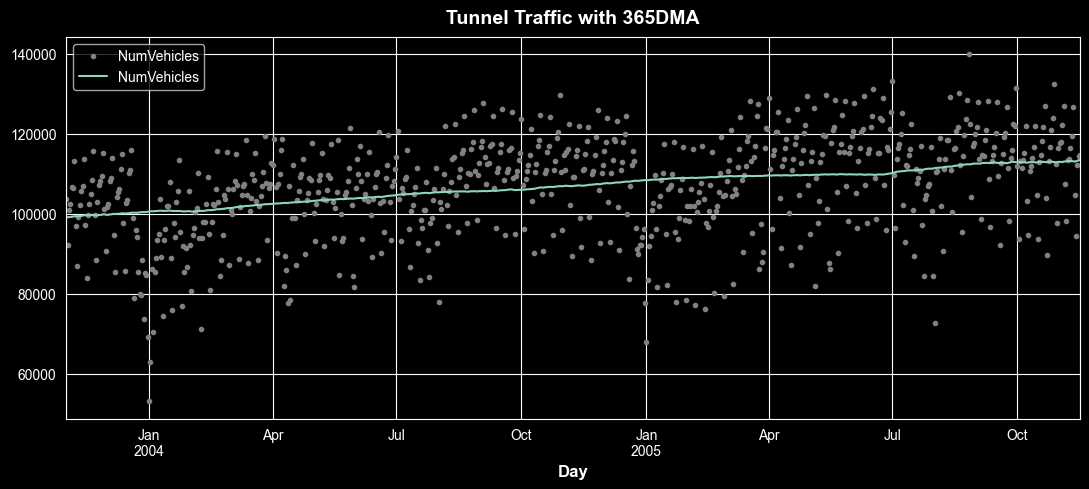

In [11]:
moving_avg = data.rolling(window=365,
                          center=True, # average at the center of the window
                          min_periods=183,
                         ).mean()

ax = data.plot(style='.', color="0.5")
moving_avg.plot(ax=ax, title="Tunnel Traffic with 365DMA")

In [12]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=data.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [13]:
from sklearn.linear_model import LinearRegression

y = data.NumVehicles

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

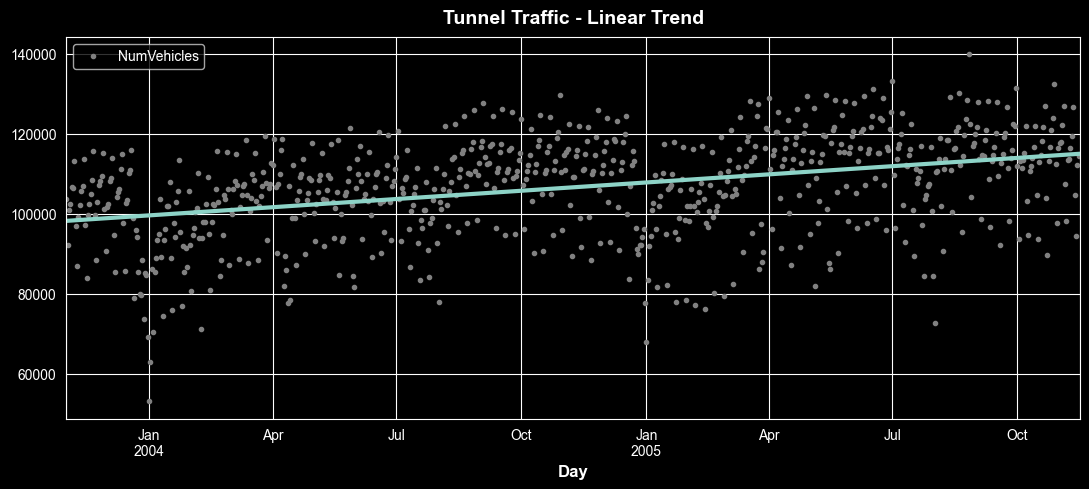

In [14]:
ax = data.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [15]:
X = dp.out_of_sample(steps=30)
y_forecast = pd.Series(model.predict(X), index=X.index)
y_forecast.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

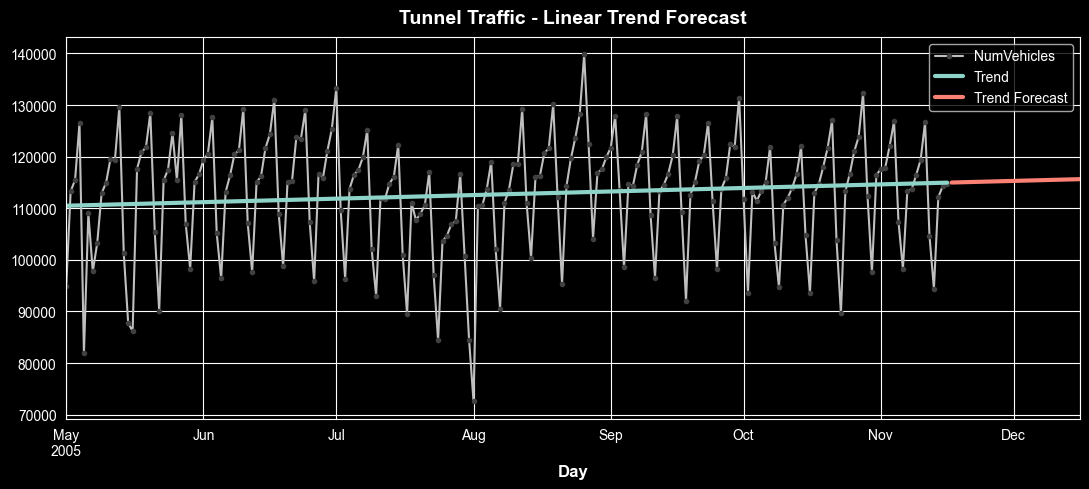

In [17]:
ax = data["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()